# Stability Analysis


The problem of stability is central to numerical computation. In general, numerical computation involves, very complicated mathematical functions. These functions could be very sensitive to the input we feed into them. However, there is some mathematical error involves in numerical computation, which is purely mathematical in nature but sometimes algorithm written for numerical solution can also cause errors. If the error caused by an algorithm is not justifiable by mathematics, we say the algorithm is $\textit{unstable}$. Here, in this protocol, we deal with a celestial system of two bodies or three bodies. We expect that, for example, the trajectory of an individual object of the system must be close and bounded, when it is integrated numerically. As a part of the course we will consider here what a stability criterion which is called  Hill stability. The set-up for Hill stability is as follows: 
%The problem with numerical calculation 
%In case of co-planar three body problems, we consider the stability what is called as Hill-stability. \
A central mass $m_1$, which is initially orbited by two smaller
bodies (planets) on circular orbits, which start in opposition $(\delta \phi = \pi)$. The mutual gravitational
perturbations will change the shape of the orbits, the eccentricities e and semi-major axes a.
Large changes are expected when the two planets are close in conjunction. A system is called
Hill-stable (or simply stable), if close encounters are excluded at all times.
The stability of the system can be examined in dependence of the initial conditions and the
masses.\\
The `$\Delta$' is the small separation of the two given masses $m_2$ , $m_3$. For a fixed initial separation
$\Delta$, we expect instability if the masses get larger.\\
The problem is simplified, when the inner planet is on a circular orbit ($e_2 = 0$) and the outer
planet is a simple test particle ($m_3 \to 0$). In this case, the method of Hill-areas can be applied
to prove Hill stability. In this method, an area in position space is searched for, on which the
relative velocity of both planets vanishes for all times. If such an area exists, the system is
Hill-stable. In this special case, Hill-stability is given for
$$\Delta >  2.4 \mu_2^{1/3}$$\\for $\delta \phi=\pi$,and
$$>2.4 \mu_2^{1/3}$$ for$ \delta \phi=\pi$.\\
where\\
\begin{equation}
    \mu_2=\frac{m_2}{m_1}
\end{equation}
which is the mass ratio of the second mass to the central mass.\\
If $\mu_2$=$\mu_3$=$\mu$, for circular orbit the stability criteria will be 
\begin{equation}
    \Delta_c \cong 3 \mu^{\frac{1}{3}}
\end{equation}
 
So in this section we present the solution of the exercise 3 which deals with the stability of the co-planer orbit. The numerical calculation has been done for 1000 orbits with the stepsize $\Delta=0.05$. The initial locations of the two smaller bodies should be opposite ($\delta \phi = \pi$). The figure (\ref{Ex3a}) and figure ($\ref{Ex3b}$) represents
the evolution of eccentricity  (e) and semimajor axis (a) by treating each trajectory of
the planet like a two-body problem (sun-planet). In both case, integration have been performed for 1000 orbits. The initial values for these calculations are taken as follows, equation (\ref{cond3}-\ref{cond33}), as suggested in the protocol exercise 3.1
\begin{gather}\label{cond3}
    m_2=10^{-5}, e_2=0, a_2=1\\
    m_3=10^{-5}, e_3=0, a_3=1+\Delta\label{cond33}
\end{gather}

We we take some example to explain the underliying concept 
1. Test the prediction of the topological stability criterion for the co-planar three-body problem. The initial values are:
\begin{align*}
    m_2 &= 10^{-5}, \quad e_2 = 0, \quad a_2 = 1 \\
    -5e_3 &= 0, \quad a_3 = 1 + \Delta, \quad m_3 = 10
\end{align*}
The initial locations of the two smaller bodies should be opposite ($\delta\phi = \pi$). Determine for each time step the orbital elements $a$ and $e$ by treating each trajectory of the planet like a two-body problem (sun-planet). Integrate the system for 1000 orbits of the inner planet with RK4 and plot the time evolution of $a$ and $e$. Use an adaptive time step. What do you observe? What is the influence of the time step size?



Center of mass is (-0.000001, 0.000000)
Done


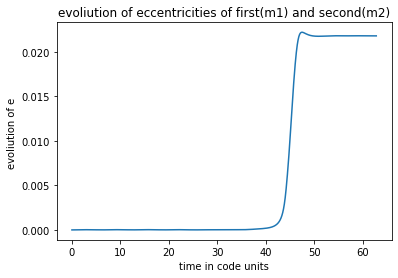

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import sys

def calc_timestep():
    dt = fixed_dt
    return dt

def accel(x, y, m):
    for i in range(len(x)):
        ax[i] = 0.0
        ay[i] = 0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            ax[i] += G*m[j] * (x[j] - x[i])/r**3
            ay[i] += G*m[j] * (y[j] - y[i])/r**3
    return ax, ay

def der_accel(x, y, vx, vy, m):
    for i in range(len(x)):
        dax[i]=0.0
        day[i]=0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            print(r)
            dax[i] += G*m[j]*((vx[j]-vx[i])/r**3-3*((vx[j]-vx[i])*(x[j] - x[i]))*(x[j] - x[i])/r**5)
            day[i] += G*m[j]*((vy[j]-vy[i])/r**3-3*((vy[j]-vy[i])*(y[j] - y[i]))*(y[j] - y[i])/r**5)
    return dax, day

def euler(x, y, vx, vy, dt):
    ax, ay = accel(x, y, m)
    x += dt*vx
    y += dt*vy
    vx += ax*dt
    vy += ay*dt

def symplectic_euler(x, y, vx, vy, dt):
    ax, ay = acceln(x, y, m)
    vx += ax*dt
    vy += ay*dt
    x += dt*vx
    y += dt*vy

def verlet(x, y, vx, vy, dt):
    #calculate a, v tilda, x,y
    ax, ay = accel(x, y, m)

    Vtx = 0.5*ax*dt
    Vty = 0.5*ay*dt

    x += dt*vx +Vtx*dt
    y += dt*vy +Vty*dt

    #calculate a(t +dt), vx, vy
    ax,ay = accel(x, y, m)
    vx += Vtx + 0.5*ax*dt
    vy += Vty + 0.5*ay*dt


def rk4(x, y, vx, vy, dt):
    x0 = x
    y0 = y 
    v0x = vx
    v0y = vy
    a0x, a0y = accel(x0, y0, m)

    v1x = v0x 
    v1y = v0y 
    K1x = dt* v1x
    K1y = dt* v1y
    K1vx = dt*a0x
    K1vy = dt*a0y

    a1x, a1y = accel(x0 + K1x/2, y0 + K1y/2, m)

    v2x = v0x + 0.5*dt*a1x
    v2y = v0y + 0.5*dt*a1y
    K2x = dt* v2x
    K2y = dt* v2y
    K2vx = dt*a1x
    K2vy = dt*a1y
    a2x, a2y = accel(x0 + K2x/2, y0 + K2y/2, m)


    v3x = v0x + 0.5*dt*a2x
    v3y = v0y + 0.5*dt*a2y
    K3x = dt* v3x
    K3y = dt* v3y
    K3vx = dt*a2x
    K3vy = dt*a2y
    a3x, a3y = accel(x0 + K3x, y0 + K3y, m)

    v4x = v0x + dt*a3x
    v4y = v0y + dt*a3y
    K4x = dt* v4x
    K4y = dt* v4y
    K4vx = dt*a3x
    K4vy = dt*a3y

    x += (1/6.0)*(K1x + 2*K2x + 2*K3x + K4x)
    y += (1/6.0)*(K1y + 2*K2y + 2*K3y + K4y)
    vx += (1/6.0)*(K1vx + 2*K2vx + 2*K3vx + K4vx)
    vy += (1/6.0)*(K1vy + 2*K2vy + 2*K3vy + K4vy)


def calc_iv(m, sma, ecc):
    x[1] = sma[1]*(1+ecc[1])
    x[2] = -sma[2]*(1+ecc[2])
    vy[1] = np.sqrt(G*np.sum(m)/sma[1] * ((1-ecc[1])/(1+ecc[1])))
    vy[2] = -np.sqrt(G*np.sum(m)/sma[2] * ((1-ecc[2])/(1+ecc[2])))
    #print(x[1],vy[1])


# function to move some bodies to the center of mass system
def to_com(x, y, vx, vy, m):
    xcm  = np.sum(m*x)/np.sum(m)
    ycm  = np.sum(m*y)/np.sum(m)
    vxcm = np.sum(m*vx)/np.sum(m)
    vycm = np.sum(m*vy)/np.sum(m)
    print("Center of mass is (%lf, %lf)" % (xcm, ycm))
    x -= xcm
    y -= ycm
    vx -= vxcm
    vy -= vycm

def energy(x, y, vx, vy, m):
    E = 0
    for i in range(len(x)):
        # kinetic part of the energy
        E += 0.5*m[i]*(vx[i]**2 + vy[i]**2)
        for j in range(i+1, len(x)):
            r = np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            E -= G*m[i]*m[j]/r
    return E

def cons_quant(xp, yp, vxp, vyp, names):
    s = np.zeros((len(xp), 3, N)) #len(xp) = time step, 3 = dimension, N = number of bodies
    v = np.zeros((len(xp), 3, N))
    for i in range(N):
        for k in range(len(s)):
            pos[k, 0, i] = xp[k][i]
            pos[k, 1, i] = yp[k][i]
            vel[k, 0, i] = vxp[k][i]
            vel[k, 1, i] = vyp[k][i]
    for i in range(N): 
        for j in range(i+1,N):
            if (i!=0 and j!=0):
                continue;
            
            R = s[:,:,i]-s[:,:,j]#N minus N+1
            V = v[:,:,i]-v[:,:,j]

            #specific angular momentum
            jj = np.cross(R,V) #vector
            jz = np.sqrt(jj[:,0]**2+jj[:,1]**2+jj[:,2]**2) #absolute value
            
            #eccentricity
            rr = np.sqrt(R[:,0]**2+R[:,1]**2+R[:,2]**2)
            A = np.cross(V,jj)/(G*sum(m))
            B = np.zeros((len(R),3))
            for k in range (len(R)):
                B[k]= R[k]/rr[k]
            C = A-B #Runge Lenz Vector
            ecc = np.sqrt(C[:,0]**2+C[:,1]**2+C[:,2]**2) #absolute value

            #semi-major axis
            smax = (jz**2/(G*sum(m)))/(1-ecc**2) 

    return jz, ecc, smax
N = 3
# universal gravity constant
G = 1.0
delta = 0.05
P = 2*np.pi




x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
m = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
dax = np.zeros(N) #dax/dt
day = np.zeros(N) #day/dt
ecc = np.zeros(N)
sma = np.zeros(N)
#jz = np.zeros(N)


m[2] = 1e-5
m[1] = 1e-5
m[0] = 1.0-m[1] - m[2]
ecc[1]=0
ecc[2]=0
sma[2] = 1.0 + delta
sma[1] = 1.0
t_begin = 0.0
t_end = 10*P

fixed_dt = P/1000
t = t_begin
calc_iv(m, sma, ecc)
to_com(x, y, vx, vy, m)

tp     = []
xp     = []
yp     = []
vxp     = []
vyp     = []
Ep = []

while t < t_end:
        
    dt = calc_timestep()
    
    rk4(x, y, vx, vy, dt)
    
    xp.append(list(x))
    yp.append(list(y))
    vxp.append(list(vx))
    vyp.append(list(vy))
    tp.append(t)

    E = energy(x, y, vx, vy, m)
    Ep.append(E)
    
    t += dt

jz,ecc,a_maj = cons_2(xp, yp, vxp, vyp)
#print(xp)
Ecc=np.array(ecc)

plt.plot(tp,Ecc)
plt.xlabel('time in code units')
plt.ylabel('evoliution of e ')
plt.title('evoliution of eccentricities of first(m1) and second(m2)')
#axs.set_aspect('equal')
plt.savefig('3_1_aa.png')
#plt.plot(xp,yp)

#plt.plot(tp,a_maj)

print("Done")

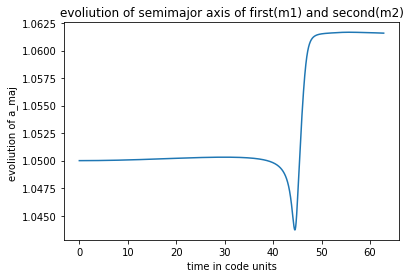

In [22]:
#plotting of evolution of angular momentum
plt.plot(tp,a_maj)
plt.xlabel('time in code units')
plt.ylabel('evoliution of a_maj ')
plt.title('evoliution of semimajor axis of first(m1) and second(m2)')
plt.savefig("3_1_bb.png")


2. Reduce the initial distance between the planets $\Delta$ stepwise and repeat the integration (note that you have to adapt the velocity of the outer planet if you change $\Delta$). For which values of $\Delta$ do you expect instability? Which value $\Delta_c$ do you find numerically?


Center of mass is (-0.000001, 0.000000)


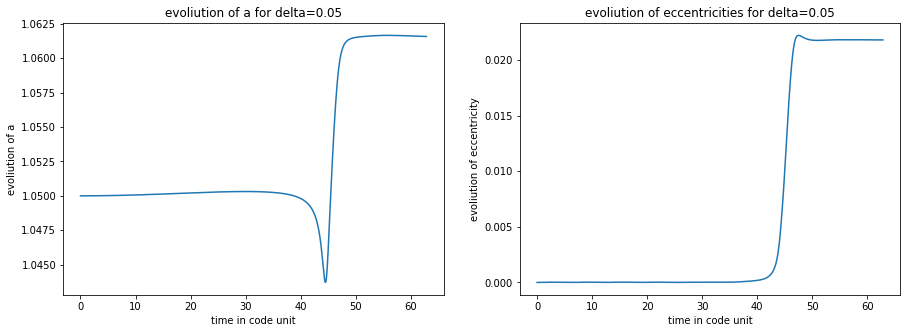

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys

def calc_timestep():
    dt = fixed_dt
    return dt

def accel(x, y, m):
    for i in range(len(x)):
        ax[i] = 0.0
        ay[i] = 0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            ax[i] += G*m[j] * (x[j] - x[i])/r**3
            ay[i] += G*m[j] * (y[j] - y[i])/r**3
    return ax, ay

def der_accel(x, y, vx, vy, m):
    for i in range(len(x)):
        dax[i]=0.0
        day[i]=0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            print(r)
            dax[i] += G*m[j]*((vx[j]-vx[i])/r**3-3*((vx[j]-vx[i])*(x[j] - x[i]))*(x[j] - x[i])/r**5)
            day[i] += G*m[j]*((vy[j]-vy[i])/r**3-3*((vy[j]-vy[i])*(y[j] - y[i]))*(y[j] - y[i])/r**5)
    return dax, day

def euler(x, y, vx, vy, dt):
    ax, ay = accel(x, y, m)
    x += dt*vx
    y += dt*vy
    vx += ax*dt
    vy += ay*dt

def symplectic_euler(x, y, vx, vy, dt):
    ax, ay = acceln(x, y, m)
    vx += ax*dt
    vy += ay*dt
    x += dt*vx
    y += dt*vy

def verlet(x, y, vx, vy, dt):
    #calculate a, v tilda, x,y
    ax, ay = accel(x, y, m)

    Vtx = 0.5*ax*dt
    Vty = 0.5*ay*dt

    x += dt*vx +Vtx*dt
    y += dt*vy +Vty*dt

    #calculate a(t +dt), vx, vy
    ax,ay = accel(x, y, m)
    vx += Vtx + 0.5*ax*dt
    vy += Vty + 0.5*ay*dt


def rk4(x, y, vx, vy, dt):
    x0 = x
    y0 = y 
    v0x = vx
    v0y = vy
    a0x, a0y = accel(x0, y0, m)

    v1x = v0x 
    v1y = v0y 
    K1x = dt* v1x
    K1y = dt* v1y
    K1vx = dt*a0x
    K1vy = dt*a0y

    a1x, a1y = accel(x0 + K1x/2, y0 + K1y/2, m)

    v2x = v0x + 0.5*dt*a1x
    v2y = v0y + 0.5*dt*a1y
    K2x = dt* v2x
    K2y = dt* v2y
    K2vx = dt*a1x
    K2vy = dt*a1y
    a2x, a2y = accel(x0 + K2x/2, y0 + K2y/2, m)


    v3x = v0x + 0.5*dt*a2x
    v3y = v0y + 0.5*dt*a2y
    K3x = dt* v3x
    K3y = dt* v3y
    K3vx = dt*a2x
    K3vy = dt*a2y
    a3x, a3y = accel(x0 + K3x, y0 + K3y, m)

    v4x = v0x + dt*a3x
    v4y = v0y + dt*a3y
    K4x = dt* v4x
    K4y = dt* v4y
    K4vx = dt*a3x
    K4vy = dt*a3y

    x += (1/6.0)*(K1x + 2*K2x + 2*K3x + K4x)
    y += (1/6.0)*(K1y + 2*K2y + 2*K3y + K4y)
    vx += (1/6.0)*(K1vx + 2*K2vx + 2*K3vx + K4vx)
    vy += (1/6.0)*(K1vy + 2*K2vy + 2*K3vy + K4vy)


def calc_iv(m, delta, ecc):
    m[2] = 1e-5
    m[1] = 1e-5
    m[0] = 1.0-m[1] - m[2]
    ecc[1]=0
    ecc[2]=0
    sma[2] = 1.0 + delta
    sma[1] = 1.0
    x[1] = sma[1]*(1+ecc[1])
    x[2] = -sma[2]*(1+ecc[2])
    vy[1] = np.sqrt(G*np.sum(m)/sma[1] * ((1-ecc[1])/(1+ecc[1])))
    vy[2] = -np.sqrt(G*np.sum(m)/sma[2] * ((1-ecc[2])/(1+ecc[2])))
    #print(x[1],vy[1])
    return x,y, vx, vy,ecc


# function to move some bodies to the center of mass system
def to_com(x, y, vx, vy, m):
    xcm  = np.sum(m*x)/np.sum(m)
    ycm  = np.sum(m*y)/np.sum(m)
    vxcm = np.sum(m*vx)/np.sum(m)
    vycm = np.sum(m*vy)/np.sum(m)
    print("Center of mass is (%lf, %lf)" % (xcm, ycm))
    x -= xcm
    y -= ycm
    vx -= vxcm
    vy -= vycm

def energy(x, y, vx, vy, m):
    E = 0
    for i in range(len(x)):
        # kinetic part of the energy
        E += 0.5*m[i]*(vx[i]**2 + vy[i]**2)
        for j in range(i+1, len(x)):
            r = np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            E -= G*m[i]*m[j]/r
    return E

def cons_2(xp, yp, vxp, vyp):
    s = np.zeros((len(xp), 3, N)) #len(xp) = time step, 3 = dimension, N = number of bodies
    v = np.zeros((len(xp), 3, N))
    for i in range(N):
        for k in range(len(pos)):
            s[k, 0, i] = xp[k][i]
            s[k, 1, i] = yp[k][i]
            v[k, 0, i] = vxp[k][i]
            v[k, 1, i] = vyp[k][i]
    for i in range(N): 
        for j in range(i+1,N):
            if (i!=0 and j!=0):
                continue;
        
            R = s[:,:,i]-s[:,:,j]
            V = v[:,:,i]-v[:,:,j]

            #specific angular momentum
            jj = np.cross(R,V) #vector
            jz = np.sqrt(jj[:,0]**2+jj[:,1]**2+jj[:,2]**2) #absolute value
            
            #eccentricity
            rr = np.sqrt(R[:,0]**2+R[:,1]**2+R[:,2]**2)
            A = np.cross(V,jj)/(G*sum(m))
            B = np.zeros((len(R),3))
            for k in range (len(R)):
                B[k]= R[k]/rr[k]
            C = A-B #Runge Lenz Vector
            ecc = np.sqrt(C[:,0]**2+C[:,1]**2+C[:,2]**2) #absolute value

            #semi-major axis
            smax = (jz**2/(G*sum(m)))/(1-ecc**2) 

    return jz, ecc, smax
N = 3
# universal gravity constant
G = 1.0
#delta = 0.05
P = 2*np.pi



x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
m = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
dax = np.zeros(N) #dax/dt
day = np.zeros(N) #day/dt
ecc = np.zeros(N)
sma = np.zeros(N)
#jz = np.zeros(N)


t_begin = 0.0
t_end = 10*P
delta=0.05
fixed_dt = P/1000
t = t_begin
calc_iv(m, delta,ecc)
to_com(x, y, vx, vy, m)

tp     = []
xp     = []
yp     = []
vxp     = []
vyp     = []
Ep = []

while t < t_end:
        
    dt = calc_timestep()
    
    rk4(x, y, vx, vy, dt)
    
    xp.append(list(x))
    yp.append(list(y))
    vxp.append(list(vx))
    vyp.append(list(vy))
    tp.append(t)

    E = energy(x, y, vx, vy, m)
    Ep.append(E)
    
    t += dt

jz,ecc,a_maj = cons_2(xp, yp, vxp, vyp)
#print(xp)
Ecc=np.array(ecc)
#varying the values of delta stepwize
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(tp,a_maj)
plt.xlabel("time in code unit")
plt.ylabel('evoliution of a')
plt.title('evoliution of a for delta=0.05')
#plt.show()
#plt.savefig("Ex_3_2_11.png")
#plotting e for various values of delta
plt.subplot(122)
plt.plot(tp,ecc)
plt.xlabel("time in code unit")
plt.ylabel('evoliution of eccentricity')
plt.title('evoliution of eccentricities for delta=0.05')
#plt.savefig("Ex_3_2_22.png")
#plt.show()
plt.savefig("Ex_3_2_ee.png")



3. Now, vary the mass of the outer planet by raising $m_3$ in steps by a factor of 5. Determine for each configuration the stability limit $\Delta_c$ and compare it to the expected value from the topological analysis. Does the result converge in the limit $m_2 \rightarrow 0$?

Center of mass is (0.000200, 0.000000)


Text(0.5, 1.0, 'evol of e for d(c)=0.03, with m3=20*m3')

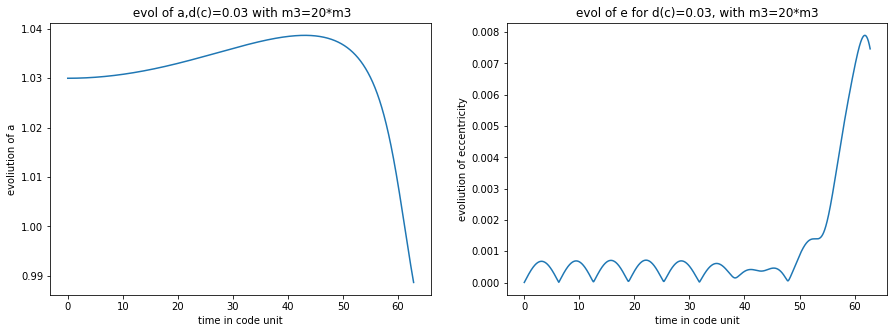

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys

def calc_timestep():
    dt = fixed_dt
    return dt

def accel(x, y, m):
    for i in range(len(x)):
        ax[i] = 0.0
        ay[i] = 0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            ax[i] += G*m[j] * (x[j] - x[i])/r**3
            ay[i] += G*m[j] * (y[j] - y[i])/r**3
    return ax, ay

def der_accel(x, y, vx, vy, m):
    for i in range(len(x)):
        dax[i]=0.0
        day[i]=0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            print(r)
            dax[i] += G*m[j]*((vx[j]-vx[i])/r**3-3*((vx[j]-vx[i])*(x[j] - x[i]))*(x[j] - x[i])/r**5)
            day[i] += G*m[j]*((vy[j]-vy[i])/r**3-3*((vy[j]-vy[i])*(y[j] - y[i]))*(y[j] - y[i])/r**5)
    return dax, day

def euler(x, y, vx, vy, dt):
    ax, ay = accel(x, y, m)
    x += dt*vx
    y += dt*vy
    vx += ax*dt
    vy += ay*dt

def symplectic_euler(x, y, vx, vy, dt):
    ax, ay = acceln(x, y, m)
    vx += ax*dt
    vy += ay*dt
    x += dt*vx
    y += dt*vy

def verlet(x, y, vx, vy, dt):
    #calculate a, v tilda, x,y
    ax, ay = accel(x, y, m)

    Vtx = 0.5*ax*dt
    Vty = 0.5*ay*dt

    x += dt*vx +Vtx*dt
    y += dt*vy +Vty*dt

    #calculate a(t +dt), vx, vy
    ax,ay = accel(x, y, m)
    vx += Vtx + 0.5*ax*dt
    vy += Vty + 0.5*ay*dt


def rk4(x, y, vx, vy, dt):
    x0 = x
    y0 = y 
    v0x = vx
    v0y = vy
    a0x, a0y = accel(x0, y0, m)

    v1x = v0x 
    v1y = v0y 
    K1x = dt* v1x
    K1y = dt* v1y
    K1vx = dt*a0x
    K1vy = dt*a0y

    a1x, a1y = accel(x0 + K1x/2, y0 + K1y/2, m)

    v2x = v0x + 0.5*dt*a1x
    v2y = v0y + 0.5*dt*a1y
    K2x = dt* v2x
    K2y = dt* v2y
    K2vx = dt*a1x
    K2vy = dt*a1y
    a2x, a2y = accel(x0 + K2x/2, y0 + K2y/2, m)


    v3x = v0x + 0.5*dt*a2x
    v3y = v0y + 0.5*dt*a2y
    K3x = dt* v3x
    K3y = dt* v3y
    K3vx = dt*a2x
    K3vy = dt*a2y
    a3x, a3y = accel(x0 + K3x, y0 + K3y, m)

    v4x = v0x + dt*a3x
    v4y = v0y + dt*a3y
    K4x = dt* v4x
    K4y = dt* v4y
    K4vx = dt*a3x
    K4vy = dt*a3y

    x += (1/6.0)*(K1x + 2*K2x + 2*K3x + K4x)
    y += (1/6.0)*(K1y + 2*K2y + 2*K3y + K4y)
    vx += (1/6.0)*(K1vx + 2*K2vx + 2*K3vx + K4vx)
    vy += (1/6.0)*(K1vy + 2*K2vy + 2*K3vy + K4vy)


def calc_iv(m, delta, ecc):
    m[2] = 0#1e-5
    m[1] = 20*1e-5
    m[0] = 1.0-m[1] - m[2]
    ecc[1]=0
    ecc[2]=0
    sma[2] = 1.0 + delta
    sma[1] = 1.0
    x[1] = sma[1]*(1+ecc[1])
    x[2] = -sma[2]*(1+ecc[2])
    vy[1] = np.sqrt(G*np.sum(m)/sma[1] * ((1-ecc[1])/(1+ecc[1])))
    vy[2] = -np.sqrt(G*np.sum(m)/sma[2] * ((1-ecc[2])/(1+ecc[2])))
    #print(x[1],vy[1])
    return x,y, vx, vy,ecc


# function to move some bodies to the center of mass system
def to_com(x, y, vx, vy, m):
    xcm  = np.sum(m*x)/np.sum(m)
    ycm  = np.sum(m*y)/np.sum(m)
    vxcm = np.sum(m*vx)/np.sum(m)
    vycm = np.sum(m*vy)/np.sum(m)
    print("Center of mass is (%lf, %lf)" % (xcm, ycm))
    x -= xcm
    y -= ycm
    vx -= vxcm
    vy -= vycm

def energy(x, y, vx, vy, m):
    E = 0
    for i in range(len(x)):
        # kinetic part of the energy
        E += 0.5*m[i]*(vx[i]**2 + vy[i]**2)
        for j in range(i+1, len(x)):
            r = np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            E -= G*m[i]*m[j]/r
    return E

def cons_2(xp, yp, vxp, vyp):
    s = np.zeros((len(xp), 3, N)) #len(xp) = time step, 3 = dimension, N = number of bodies
    v= np.zeros((len(xp), 3, N))
    for i in range(N):
        for k in range(len(s)):
            s[k, 0, i] = xp[k][i]
            s[k, 1, i] = yp[k][i]
            v[k, 0, i] = vxp[k][i]
            v[k, 1, i] = vyp[k][i]
    for i in range(N): #!!!!!!!!!here for changes in the bodies, currently calculating j, e, a of bodies i and i+1
        for j in range(i+1,N):
            if (i!=0 and j!=0):
                continue;
            #store position coordinates of all bodies in one matrix, same with velocity
            R = s[:,:,i]-s[:,:,j]#N minus N+1
            V = v[:,:,i]-v[:,:,j]

            #specific angular momentum
            jj = np.cross(R,V) #vector
            jz = np.sqrt(jj[:,0]**2+jj[:,1]**2+jj[:,2]**2) #absolute value
            
            #eccentricity
            rr = np.sqrt(R[:,0]**2+R[:,1]**2+R[:,2]**2)
            A = np.cross(V,jj)/(G*sum(m))
            B = np.zeros((len(R),3))
            for k in range (len(R)):
                B[k]= R[k]/rr[k]
            C = A-B #Runge Lenz Vector
            ecc = np.sqrt(C[:,0]**2+C[:,1]**2+C[:,2]**2) #absolute value

            #semi-major axis
            smax = (jz**2/(G*sum(m)))/(1-ecc**2) 

    return jz, ecc, smax
N = 3
# universal gravity constant
G = 1.0
#delta = 0.05
P = 2*np.pi


x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
m = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
dax = np.zeros(N) #dax/dt
day = np.zeros(N) #day/dt
ecc = np.zeros(N)
sma = np.zeros(N)
#jz = np.zeros(N)


t_begin = 0.0
t_end = 10*P
delta=0.03#critical value of delta, represented as d(c)
fixed_dt = P/1000
t = t_begin
calc_iv(m, delta,ecc)
to_com(x, y, vx, vy, m)

tp     = []
xp     = []
yp     = []
vxp     = []
vyp     = []
Ep = []

while t < t_end:
        
    dt = calc_timestep()
    
    rk4(x, y, vx, vy, dt)
    
    xp.append(list(x))
    yp.append(list(y))
    vxp.append(list(vx))
    vyp.append(list(vy))
    tp.append(t)

    E = energy(x, y, vx, vy, m)
    Ep.append(E)
    
    t += dt

jz,ecc,a_maj = cons_2(xp, yp, vxp, vyp)
#print(xp)
Ecc=np.array(ecc)
#varying the values of delta stepwize
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(tp,a_maj)
plt.xlabel("time in code unit")
plt.ylabel('evoliution of a')
plt.title(' evol of a,d(c)=0.03 with m3=20*m3')#m3 has been substituted integral multiple of previous m3

plt.subplot(122)
plt.plot(tp,ecc)
plt.xlabel("time in code unit")
plt.ylabel('evoliution of eccentricity')
plt.title('evol of e for d(c)=0.03, with m3=20*m3')
#plt.savefig("Ex_3_2_22.png")
#plt.show()
#plt.savefig("Ex_3_3_ee.png")
    


# Choatic Dynamics 

To determine the value of the stability limit $\Delta_c$, we have stopped the evolution of the system at the first encounter of the two planets. However, the further evolution of the system is also interesting, since it shows complex dynamic behavior, which is chaotic. In this last exercise, we want to investigate this chaotic phenomenon empirically.

The probability for close encounters is especially high if the planetary orbits overlap initially. The circular ring around the central star, in which the outer planet has to start initially in order to experience a close encounter later on, is called the crossing zone. The outer rim of the crossing zone is the Hill limit $\Delta_c$.

For Example

The system
\begin{gather}
    m_2 = 10^{-6}, \quad e_2 = 0, \quad m_3 = 10^{-6}, \quad a_2 = 1, \quad e_3 = 0, \quad a_3 = 1 + \Delta
\end{gther}
is stable for $\Delta_c = 0.0302$ (eq. 51).

Calculate the time evolution of the system for the initial values of $\Delta$ in the crossing zone, for instance:
\begin{gather}
    \Delta = 0.026, \quad 0.028, \quad 0.030, \quad 0.0302, \quad 0.0305
\end{gather}


Center of mass is (-0.000000, 0.000000)


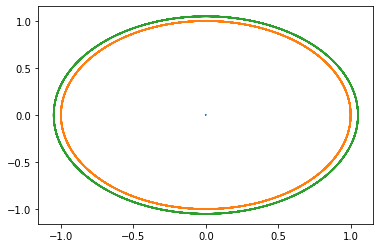

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys

def calc_timestep():
    dt = fixed_dt
    return dt

def accel(x, y, m):
    for i in range(len(x)):
        ax[i] = 0.0
        ay[i] = 0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            ax[i] += G*m[j] * (x[j] - x[i])/r**3
            ay[i] += G*m[j] * (y[j] - y[i])/r**3
    return ax, ay

def der_accel(x, y, vx, vy, m):
    for i in range(len(x)):
        dax[i]=0.0
        day[i]=0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            print(r)
            dax[i] += G*m[j]*((vx[j]-vx[i])/r**3-3*((vx[j]-vx[i])*(x[j] - x[i]))*(x[j] - x[i])/r**5)
            day[i] += G*m[j]*((vy[j]-vy[i])/r**3-3*((vy[j]-vy[i])*(y[j] - y[i]))*(y[j] - y[i])/r**5)
    return dax, day

def euler(x, y, vx, vy, dt):
    ax, ay = accel(x, y, m)
    x += dt*vx
    y += dt*vy
    vx += ax*dt
    vy += ay*dt

def symplectic_euler(x, y, vx, vy, dt):
    ax, ay = acceln(x, y, m)
    vx += ax*dt
    vy += ay*dt
    x += dt*vx
    y += dt*vy

def verlet(x, y, vx, vy, dt):
    #calculate a, v tilda, x,y
    ax, ay = accel(x, y, m)

    Vtx = 0.5*ax*dt
    Vty = 0.5*ay*dt

    x += dt*vx +Vtx*dt
    y += dt*vy +Vty*dt

    #calculate a(t +dt), vx, vy
    ax,ay = accel(x, y, m)
    vx += Vtx + 0.5*ax*dt
    vy += Vty + 0.5*ay*dt


def rk4(x, y, vx, vy, dt):
    x0 = x
    y0 = y 
    v0x = vx
    v0y = vy
    a0x, a0y = accel(x0, y0, m)

    v1x = v0x 
    v1y = v0y 
    K1x = dt* v1x
    K1y = dt* v1y
    K1vx = dt*a0x
    K1vy = dt*a0y

    a1x, a1y = accel(x0 + K1x/2, y0 + K1y/2, m)

    v2x = v0x + 0.5*dt*a1x
    v2y = v0y + 0.5*dt*a1y
    K2x = dt* v2x
    K2y = dt* v2y
    K2vx = dt*a1x
    K2vy = dt*a1y
    a2x, a2y = accel(x0 + K2x/2, y0 + K2y/2, m)


    v3x = v0x + 0.5*dt*a2x
    v3y = v0y + 0.5*dt*a2y
    K3x = dt* v3x
    K3y = dt* v3y
    K3vx = dt*a2x
    K3vy = dt*a2y
    a3x, a3y = accel(x0 + K3x, y0 + K3y, m)

    v4x = v0x + dt*a3x
    v4y = v0y + dt*a3y
    K4x = dt* v4x
    K4y = dt* v4y
    K4vx = dt*a3x
    K4vy = dt*a3y

    x += (1/6.0)*(K1x + 2*K2x + 2*K3x + K4x)
    y += (1/6.0)*(K1y + 2*K2y + 2*K3y + K4y)
    vx += (1/6.0)*(K1vx + 2*K2vx + 2*K3vx + K4vx)
    vy += (1/6.0)*(K1vy + 2*K2vy + 2*K3vy + K4vy)


def calc_iv(m, delta, ecc):
    m[2] = 1e-6
    m[1] = 1e-6
    m[0] = 1.0-m[1] - m[2]
    ecc[1]=0
    ecc[2]=0
    sma[2] = 1.0 + delta
    sma[1] = 1.0
    x[1] = sma[1]*(1+ecc[1])
    x[2] = -sma[2]*(1+ecc[2])
    vy[1] = np.sqrt(G*np.sum(m)/sma[1] * ((1-ecc[1])/(1+ecc[1])))
    vy[2] = -np.sqrt(G*np.sum(m)/sma[2] * ((1-ecc[2])/(1+ecc[2])))
    #print(x[1],vy[1])
    return x,y, vx, vy,ecc


# function to move some bodies to the center of mass system
def to_com(x, y, vx, vy, m):
    xcm  = np.sum(m*x)/np.sum(m)
    ycm  = np.sum(m*y)/np.sum(m)
    vxcm = np.sum(m*vx)/np.sum(m)
    vycm = np.sum(m*vy)/np.sum(m)
    print("Center of mass is (%lf, %lf)" % (xcm, ycm))
    x -= xcm
    y -= ycm
    vx -= vxcm
    vy -= vycm

def energy(x, y, vx, vy, m):
    E = 0
    for i in range(len(x)):
        # kinetic part of the energy
        E += 0.5*m[i]*(vx[i]**2 + vy[i]**2)
        for j in range(i+1, len(x)):
            r = np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            E -= G*m[i]*m[j]/r
    return E

def cons_2(xp, yp, vxp, vyp):
    s = np.zeros((len(xp), 3, N)) #len(xp) = time step, 3 = dimension, N = number of bodies
    v = np.zeros((len(xp), 3, N))
    for i in range(N):
        for k in range(len(s)):
            s[k, 0, i] = xp[k][i]
            s[k, 1, i] = yp[k][i]
            v[k, 0, i] = vxp[k][i]
            v[k, 1, i] = vyp[k][i]
    for i in range(N):
        for j in range(i+1,N):
            if (i!=0 and j!=0):
                continue;
           
            R = s[:,:,i]-s[:,:,j]
            V = v[:,:,i]-v[:,:,j]

            #specific angular momentum
            jj = np.cross(R,V) #vector
            jz = np.sqrt(jj[:,0]**2+jj[:,1]**2+jj[:,2]**2) #absolute value
            
            #eccentricity
            rr = np.sqrt(R[:,0]**2+R[:,1]**2+R[:,2]**2)
            A = np.cross(V,jj)/(G*sum(m))
            B = np.zeros((len(R),3))
            for k in range (len(R)):
                B[k]= R[k]/rr[k]
            C = A-B #Runge Lenz Vector
            ecc = np.sqrt(C[:,0]**2+C[:,1]**2+C[:,2]**2) #absolute value

            #semi-major axis
            smax = (jz**2/(G*sum(m)))/(1-ecc**2) 

    return jz, ecc, smax
N = 3
# universal gravity constant
G = 1.0
#delta = 0.05
P = 2*np.pi



x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
m = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
dax = np.zeros(N) #dax/dt
day = np.zeros(N) #day/dt
ecc = np.zeros(N)
sma = np.zeros(N)
#jz = np.zeros(N)


t_begin = 0.0
t_end = 10*P
delta=0.0502#in the excercies 4.1 represented as d(c)
fixed_dt = P/1000
t = t_begin
calc_iv(m, delta,ecc)
to_com(x, y, vx, vy, m)

tp     = []
xp     = []
yp     = []
vxp     = []
vyp     = []
Ep = []

while t < t_end:
        
    dt = calc_timestep()
    
    rk4(x, y, vx, vy, dt)
    
    xp.append(list(x))
    yp.append(list(y))
    vxp.append(list(vx))
    vyp.append(list(vy))
    tp.append(t)

    E = energy(x, y, vx, vy, m)
    Ep.append(E)
    
    t += dt

jz,ecc,a_maj = cons_2(xp, yp, vxp, vyp)
#print(xp)
Ecc=np.array(ecc)
plt.plot(xp,yp)

The time evolution of both eccentricities e2 and e3 has been plotted, and both semi-major axes a2 and
a3 . 

Center of mass is (-0.000000, 0.000000)


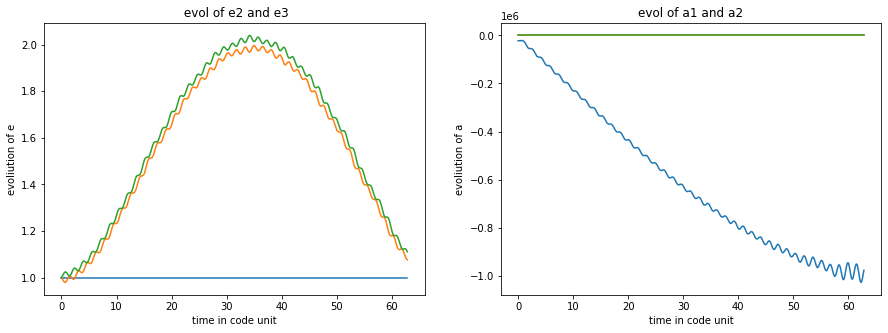

In [155]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys

def calc_timestep():
    dt = fixed_dt
    return dt

def accel(x, y, m):
    for i in range(len(x)):
        ax[i] = 0.0
        ay[i] = 0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            ax[i] += G*m[j] * (x[j] - x[i])/r**3
            ay[i] += G*m[j] * (y[j] - y[i])/r**3
    return ax, ay

def der_accel(x, y, vx, vy, m):
    for i in range(len(x)):
        dax[i]=0.0
        day[i]=0.0
        for j in range(len(x)):
            if (i == j):
                continue
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            print(r)
            dax[i] += G*m[j]*((vx[j]-vx[i])/r**3-3*((vx[j]-vx[i])*(x[j] - x[i]))*(x[j] - x[i])/r**5)
            day[i] += G*m[j]*((vy[j]-vy[i])/r**3-3*((vy[j]-vy[i])*(y[j] - y[i]))*(y[j] - y[i])/r**5)
    return dax, day

def euler(x, y, vx, vy, dt):
    ax, ay = accel(x, y, m)
    x += dt*vx
    y += dt*vy
    vx += ax*dt
    vy += ay*dt

def symplectic_euler(x, y, vx, vy, dt):
    ax, ay = acceln(x, y, m)
    vx += ax*dt
    vy += ay*dt
    x += dt*vx
    y += dt*vy

def verlet(x, y, vx, vy, dt):
    #calculate a, v tilda, x,y
    ax, ay = accel(x, y, m)

    Vtx = 0.5*ax*dt
    Vty = 0.5*ay*dt

    x += dt*vx +Vtx*dt
    y += dt*vy +Vty*dt

    #calculate a(t +dt), vx, vy
    ax,ay = accel(x, y, m)
    vx += Vtx + 0.5*ax*dt
    vy += Vty + 0.5*ay*dt


def rk4(x, y, vx, vy, dt):
    x0 = x
    y0 = y 
    v0x = vx
    v0y = vy
    a0x, a0y = accel(x0, y0, m)

    v1x = v0x 
    v1y = v0y 
    K1x = dt* v1x
    K1y = dt* v1y
    K1vx = dt*a0x
    K1vy = dt*a0y

    a1x, a1y = accel(x0 + K1x/2, y0 + K1y/2, m)

    v2x = v0x + 0.5*dt*a1x
    v2y = v0y + 0.5*dt*a1y
    K2x = dt* v2x
    K2y = dt* v2y
    K2vx = dt*a1x
    K2vy = dt*a1y
    a2x, a2y = accel(x0 + K2x/2, y0 + K2y/2, m)


    v3x = v0x + 0.5*dt*a2x
    v3y = v0y + 0.5*dt*a2y
    K3x = dt* v3x
    K3y = dt* v3y
    K3vx = dt*a2x
    K3vy = dt*a2y
    a3x, a3y = accel(x0 + K3x, y0 + K3y, m)

    v4x = v0x + dt*a3x
    v4y = v0y + dt*a3y
    K4x = dt* v4x
    K4y = dt* v4y
    K4vx = dt*a3x
    K4vy = dt*a3y

    x += (1/6.0)*(K1x + 2*K2x + 2*K3x + K4x)
    y += (1/6.0)*(K1y + 2*K2y + 2*K3y + K4y)
    vx += (1/6.0)*(K1vx + 2*K2vx + 2*K3vx + K4vx)
    vy += (1/6.0)*(K1vy + 2*K2vy + 2*K3vy + K4vy)


def calc_iv(m, delta, ecc):
    m[2] = 1e-6
    m[1] = 1e-6
    m[0] = 1.0-m[1] - m[2]
    ecc[1]=0
    ecc[2]=0
    sma[2] = 1.0 + delta
    sma[1] = 1.0
    x[1] = sma[1]*(1+ecc[1])
    x[2] = -sma[2]*(1+ecc[2])
    vy[1] = np.sqrt(G*np.sum(m)/sma[1] * ((1-ecc[1])/(1+ecc[1])))
    vy[2] = -np.sqrt(G*np.sum(m)/sma[2] * ((1-ecc[2])/(1+ecc[2])))
    #print(x[1],vy[1])
    return x,y, vx, vy,ecc


# function to move some bodies to the center of mass system
def to_com(x, y, vx, vy, m):
    xcm  = np.sum(m*x)/np.sum(m)
    ycm  = np.sum(m*y)/np.sum(m)
    vxcm = np.sum(m*vx)/np.sum(m)
    vycm = np.sum(m*vy)/np.sum(m)
    print("Center of mass is (%lf, %lf)" % (xcm, ycm))
    x -= xcm
    y -= ycm
    vx -= vxcm
    vy -= vycm

def energy(x, y, vx, vy, m):
    E = 0
    for i in range(len(x)):
        # kinetic part of the energy
        E += 0.5*m[i]*(vx[i]**2 + vy[i]**2)
        for j in range(i+1, len(x)):
            r = np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            E -= G*m[i]*m[j]/r
    return E

def smax_2(xp,yp, vxp, vyp):
    rr=[xp,yp]
    vv=[vxp,vyp]
    jj=np.cross(rr,vv)
    jz=np.sqrt(jj[0,:,:]**2+jj[1,:,:]**2)#absolute value of jj
    A= np.cross(jj,vv)
    r_val=np.sqrt(np.array(xp)**2+np.array(yp)**2)
    B=[xp/r_val,yp/r_val]
    C=np.array(A)-np.array(B)
    ec=np.sqrt(C[0,:,:]**2+C[1,:,:]**2)
    smax=(jz**2/(G*sum(m)))/(1-ec**2)
    return ec,smax
N = 3
# universal gravity constant
G = 1.0
#delta = 0.05
P = 2*np.pi
colourz = ['red', 'green']
namez = ['body1', 'body2']

all_xp   = []
all_yp   = []
all_en   = []
all_j    = []
all_ecc  = []
all_smax = []


x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
m = np.zeros(N)
ax = np.zeros(N)
ay = np.zeros(N)
dax = np.zeros(N) #dax/dt
day = np.zeros(N) #day/dt
ecc = np.zeros(N)
sma = np.zeros(N)
#jz = np.zeros(N)


t_begin = 0.0
t_end = 10*P
delta=0.0302#critical value of delta, represented as d(c)
fixed_dt = P/50
t = t_begin
calc_iv(m, delta,ecc)
to_com(x, y, vx, vy, m)

tp     = []
xp     = []
yp     = []
vxp     = []
vyp     = []
Ep = []

while t < t_end:
        
    dt = calc_timestep()
    
    rk4(x, y, vx, vy, dt)
    
    xp.append(list(x))
    yp.append(list(y))
    vxp.append(list(vx))
    vyp.append(list(vy))
    tp.append(t)

    E = energy(x, y, vx, vy, m)
    Ep.append(E)
    
    t += dt

jz,ecc,a_maj = cons_2(xp, yp, vxp, vyp)
cc,rd=smax_2(xp,yp, vxp, vyp)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(tp,cc)
plt.xlabel("time in code unit")
plt.ylabel('evoliution of e')
plt.title(' evol of e2 and e3')#m3 has been substituted integral multiple of previous m3

plt.subplot(122)
plt.plot(tp,rd)
plt.xlabel("time in code unit")
plt.ylabel('evoliution of a')
plt.title('evol of a1 and a2')
plt.savefig('ex_4_2.png')
#plt.plot(tp,cc)
#print(rd.shape)